In [13]:
import matplotlib.pyplot as plt
from matplotlib import ticker
import numpy as np
import scipy.io 
import sys
sys.path.append('/Users/yjzhu/Desktop/Solar/MyPy')
import juanfit
import importlib
importlib.reload(juanfit)
from juanfit import SpectrumFitSingle, SpectrumFitRow
from juanfit import gaussian
import cmcrameri.cm as cmcm
import sumerpy
importlib.reload(sumerpy)
from sumerpy import con_width_funct_4

In [2]:
sumer_img = scipy.io.readsav("../../save/sumer_merg.sav")["int_merg"]
wvl_509 = np.linspace(0,1023,1024)*0.04381162280734919 + 1015.1032588901901
sumer_509_window = sumer_img[:,2048:3072]
sumer_509_window.shape

(300, 1024)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:620: RuntimeWarning: overflow encountered in multiply
  xa *= self.N


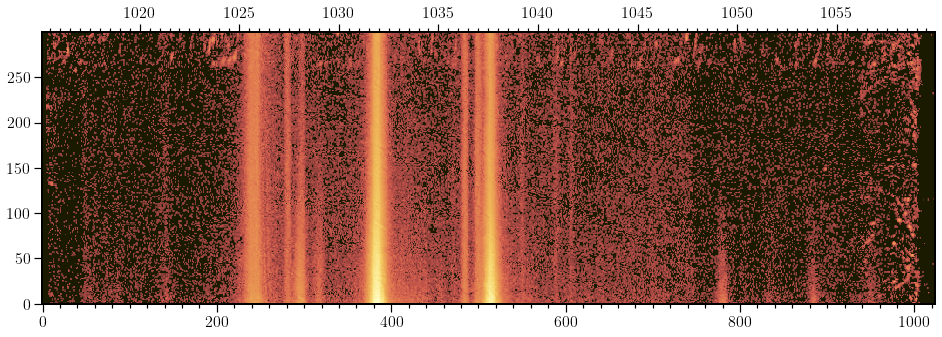

In [3]:
fig, ax = plt.subplots(figsize=(16,5))
ax.pcolormesh(np.arange(1024),np.arange(299,-1,-1),np.nan_to_num(np.log10(sumer_509_window),nan=-np.inf),
                  cmap=cmcm.lajolla_r,shading="auto",vmin=-5)

ax_wvl = ax.twiny()
ax_wvl.set_xlim(wvl_509[0],wvl_509[-1])
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(10))
ax_wvl.xaxis.set_minor_locator(ticker.AutoMinorLocator(10))
for ax_ in (ax, ax_wvl):
    ax_.tick_params(labelsize=16)
    ax_.tick_params(which="major",width=1.2,length=8)
    ax_.tick_params(which="minor",width=1.2,length=4)

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:196: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


<AxesSubplot:title={'center':'\\textbf{O \\textsc{i} 1027 \\& 1028 \\mbox{\\AA} \\& Fe \\textsc{x} 1028 \\mbox{\\AA}}'}, ylabel='Intensity $\\mathrm{[DN\\cdot s^{-1}]}$'>

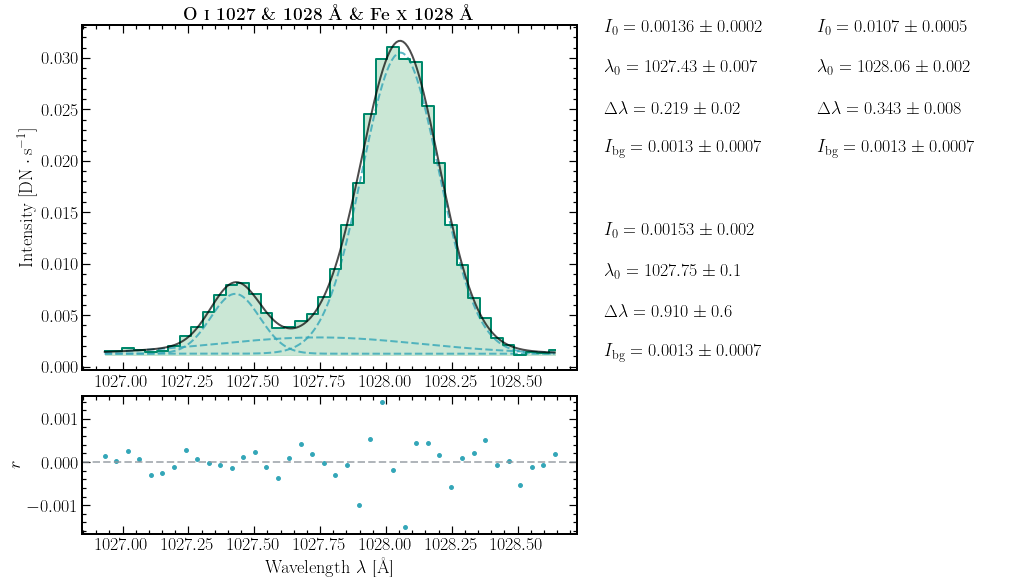

In [4]:
FeX_OI_1028_slice = (270,310)
wvl_FeX_OI_1028 = wvl_509[FeX_OI_1028_slice[0]:FeX_OI_1028_slice[1]]
int_FeX_OI_1028 = np.average(sumer_509_window[-30:,FeX_OI_1028_slice[0]:FeX_OI_1028_slice[1]],axis=0)

FeX_OI_1028_fit_model = SpectrumFitSingle(data=int_FeX_OI_1028,wvl=wvl_FeX_OI_1028,err=None,
                                      same_width=False,line_number=3,line_wvl_init=[1027.35,1028.04,1028.15],
                                      int_max_init=[0.005,0.015,0.003],fwhm_init=[0.2,0.2,0.2])
#FeX_OI_1028_fit_model.plot(plot_fit=False,plot_params=False)
FeX_OI_1028_fit_model.run_lse()
#FeX_OI_1028_fit_model.run_HahnMC(n_chain=10000)
FeX_OI_1028_fit_model.plot(plot_title=r"\textbf{O \textsc{i} 1027 \& 1028 \mbox{\AA} \& Fe \textsc{x} 1028 \mbox{\AA}}",
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                               ylabel=r"Intensity $\mathrm{[DN\cdot s^{-1}]}$",
                              color_style="Green")

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:196: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


<AxesSubplot:title={'center':'\\textbf{O \\textsc{i} 1027 \\& 1028 \\mbox{\\AA} \\& Fe \\textsc{x} 1028 \\mbox{\\AA}}'}, ylabel='Intensity $\\mathrm{[DN\\cdot s^{-1}]}$'>

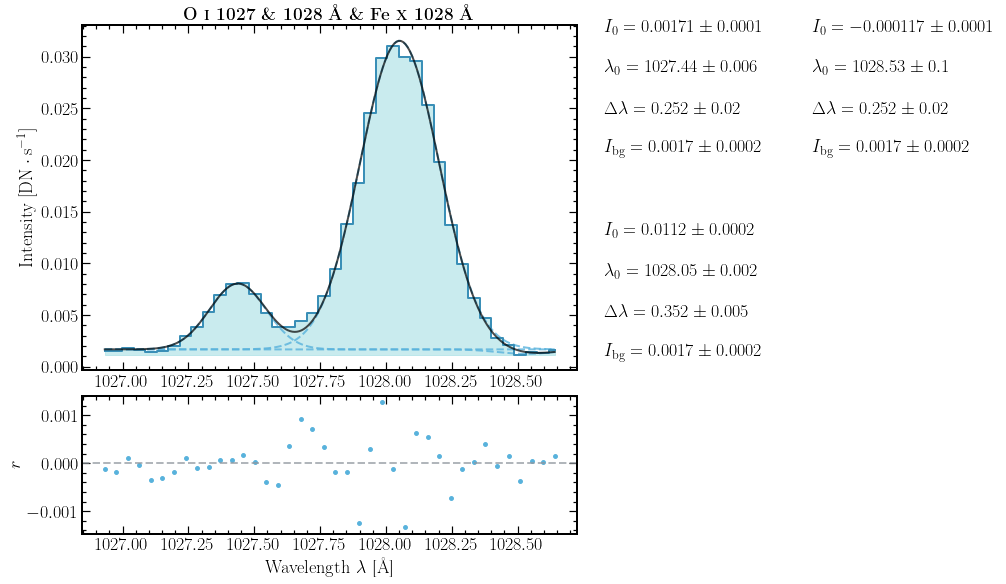

In [5]:
FeX_OI_1028_slice = (270,310)
wvl_FeX_OI_1028 = wvl_509[FeX_OI_1028_slice[0]:FeX_OI_1028_slice[1]]
int_FeX_OI_1028 = np.average(sumer_509_window[-30:,FeX_OI_1028_slice[0]:FeX_OI_1028_slice[1]],axis=0)

FeX_OI_1028_fit_model = SpectrumFitSingle(data=int_FeX_OI_1028,wvl=wvl_FeX_OI_1028,err=None,
                                      same_width=[True,False,True],line_number=3,line_wvl_init=[1027.35,1028.04,1028.15],
                                      int_max_init=[0.005,0.015,0.003],fwhm_init=[0.2,0.2,0.2])
#FeX_OI_1028_fit_model.plot(plot_fit=False,plot_params=False)
FeX_OI_1028_fit_model.run_lse()
#FeX_OI_1028_fit_model.run_HahnMC(n_chain=10000)
FeX_OI_1028_fit_model.plot(plot_title=r"\textbf{O \textsc{i} 1027 \& 1028 \mbox{\AA} \& Fe \textsc{x} 1028 \mbox{\AA}}",
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                               ylabel=r"Intensity $\mathrm{[DN\cdot s^{-1}]}$",
                              color_style="Blue")

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:196: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")
/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:448: UserWarning: Use custom function in the fitting. Will not plot fitted parameters.
  warn("Use custom function in the fitting. Will not plot fitted parameters.")


FWHM after removing instrumental broadening:  [177.86266637 297.10183556 177.86266637]


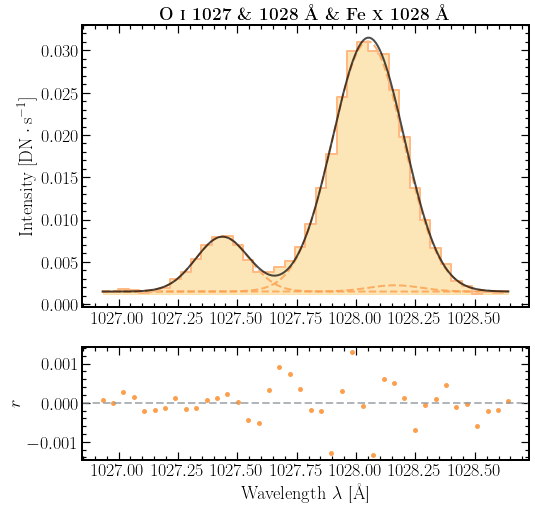

In [16]:
FeX_OI_1028_slice = (270,310)
wvl_FeX_OI_1028 = wvl_509[FeX_OI_1028_slice[0]:FeX_OI_1028_slice[1]]
int_FeX_OI_1028 = np.average(sumer_509_window[-30:,FeX_OI_1028_slice[0]:FeX_OI_1028_slice[1]],axis=0)

def FeX_OI_fit_func(wvl,int1,int2,int3,wvl1,wvl2,fwhm1,fwhm2,int_cont):
    return gaussian(wvl,wvl1,int1,fwhm1) + gaussian(wvl,wvl2,int2,fwhm2) + \
             + gaussian(wvl,wvl1+1028.157-1027.431,int3,fwhm1) + int_cont

FeX_OI_1028_fit_model = SpectrumFitSingle(data=int_FeX_OI_1028,wvl=wvl_FeX_OI_1028,err=None,custom_func=FeX_OI_fit_func,
                                      custom_init=[0.005,0.015,0.003,1027.35,1028.04,0.2,0.2,0])
#FeX_OI_1028_fit_model.plot(plot_fit=False,plot_params=False)
FeX_OI_1028_fit_model.run_lse()
#FeX_OI_1028_fit_model.run_HahnMC(n_chain=10000)
ax = FeX_OI_1028_fit_model.plot(plot_title=r"\textbf{O \textsc{i} 1027 \& 1028 \mbox{\AA} \& Fe \textsc{x} 1028 \mbox{\AA}}",
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                               ylabel=r"Intensity $\mathrm{[DN\cdot s^{-1}]}$",
                              color_style="Yellow")
ax.plot(FeX_OI_1028_fit_model.wvl_plot,gaussian(FeX_OI_1028_fit_model.wvl_plot,FeX_OI_1028_fit_model.custom_fit[3],
        FeX_OI_1028_fit_model.custom_fit[0],FeX_OI_1028_fit_model.custom_fit[5])+FeX_OI_1028_fit_model.custom_fit[-1],
        lw=2,alpha=0.8,ls="--",color="#FC9F4D")
ax.plot(FeX_OI_1028_fit_model.wvl_plot,gaussian(FeX_OI_1028_fit_model.wvl_plot,FeX_OI_1028_fit_model.custom_fit[4],
        FeX_OI_1028_fit_model.custom_fit[1],FeX_OI_1028_fit_model.custom_fit[6])+FeX_OI_1028_fit_model.custom_fit[-1],
        lw=2,alpha=0.8,ls="--",color="#FC9F4D")
ax.plot(FeX_OI_1028_fit_model.wvl_plot,gaussian(FeX_OI_1028_fit_model.wvl_plot,FeX_OI_1028_fit_model.custom_fit[3]+1028.157-1027.431,
        FeX_OI_1028_fit_model.custom_fit[2],FeX_OI_1028_fit_model.custom_fit[5])+FeX_OI_1028_fit_model.custom_fit[-1],
        lw=2,alpha=0.8,ls="--",color="#FC9F4D")
print("FWHM after removing instrumental broadening: ",
con_width_funct_4(1,np.concatenate((FeX_OI_1028_fit_model.custom_fit[3:5],FeX_OI_1028_fit_model.custom_fit[3]+1028.157-1027.431),axis=None),
1,np.concatenate((FeX_OI_1028_fit_model.custom_fit[5:7],FeX_OI_1028_fit_model.custom_fit[5]),axis=None)*1000,DET_B=True))

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:196: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


FWHM after removing instrumental broadening:  [198.82575838 302.24264508 235.70742125]


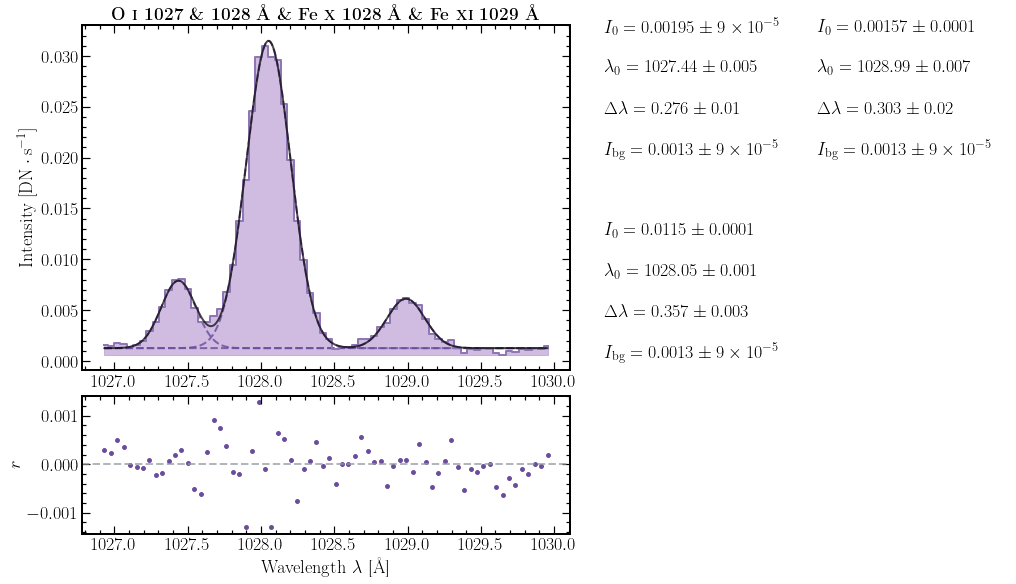

In [17]:
FeX_OI_1028_slice = (270,340)
wvl_FeX_OI_1028 = wvl_509[FeX_OI_1028_slice[0]:FeX_OI_1028_slice[1]]
int_FeX_OI_1028 = np.average(sumer_509_window[-30:,FeX_OI_1028_slice[0]:FeX_OI_1028_slice[1]],axis=0)

FeX_OI_1028_fit_model = SpectrumFitSingle(data=int_FeX_OI_1028,wvl=wvl_FeX_OI_1028,err=None,
                                      same_width=False,line_number=3,line_wvl_init=[1027.35,1028.04,1029],
                                      int_max_init=[0.005,0.015,0.005],fwhm_init=[0.2,0.2,0.2])
#FeX_OI_1028_fit_model.plot(plot_fit=False,plot_params=False)
FeX_OI_1028_fit_model.run_lse()
#FeX_OI_1028_fit_model.run_HahnMC(n_chain=10000)
FeX_OI_1028_fit_model.plot(plot_title=r"\textbf{O \textsc{i} 1027 \& 1028 \mbox{\AA} \& Fe \textsc{x} 1028 \mbox{\AA} \& Fe \textsc{xi} 1029 \mbox{\AA}}",
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                               ylabel=r"Intensity $\mathrm{[DN\cdot s^{-1}]}$",
                              color_style="Purple")
print("FWHM after removing instrumental broadening: ",
con_width_funct_4(1,FeX_OI_1028_fit_model.line_wvl_fit,1,FeX_OI_1028_fit_model.fwhm_fit*1000,DET_B=True))

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:196: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


FWHM after removing instrumental broadening:  [250.72292466]


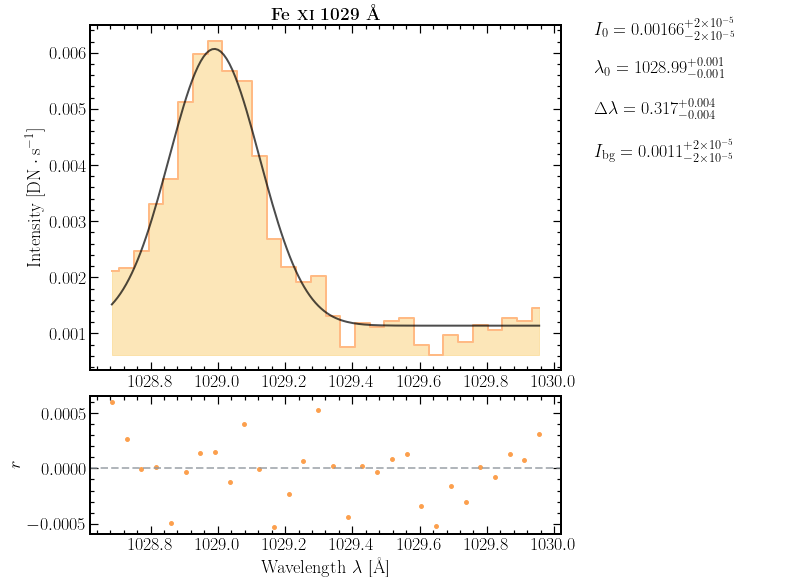

In [18]:
FeXI_1029_slice = (310,340)
wvl_FeXI_1029 = wvl_509[FeXI_1029_slice[0]:FeXI_1029_slice[1]]
int_FeXI_1029 = np.average(sumer_509_window[-30:,FeXI_1029_slice[0]:FeXI_1029_slice[1]],axis=0)

FeXI_1029_fit_model = SpectrumFitSingle(data=int_FeXI_1029,wvl=wvl_FeXI_1029,err=None,
                                      same_width=False,line_number=1,line_wvl_init=[1029],
                                      int_max_init=[0.006],fwhm_init=[0.2])
#FeXI_1029_fit_model.plot(plot_fit=False,plot_params=False)
#FeXI_1029_fit_model.run_lse()
FeXI_1029_fit_model.run_HahnMC(n_chain=10000)
FeXI_1029_fit_model.plot(plot_title=r"\textbf{Fe \textsc{xi} 1029 \mbox{\AA}}",plot_hmc=True,
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                               ylabel=r"Intensity $\mathrm{[DN\cdot s^{-1}]}$",
                              color_style="Yellow")
print("FWHM after removing instrumental broadening: ",
con_width_funct_4(1,FeXI_1029_fit_model.line_wvl_fit,1,FeXI_1029_fit_model.fwhm_fit*1000,DET_B=True))

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:196: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


FWHM after removing instrumental broadening:  [255.1128011]


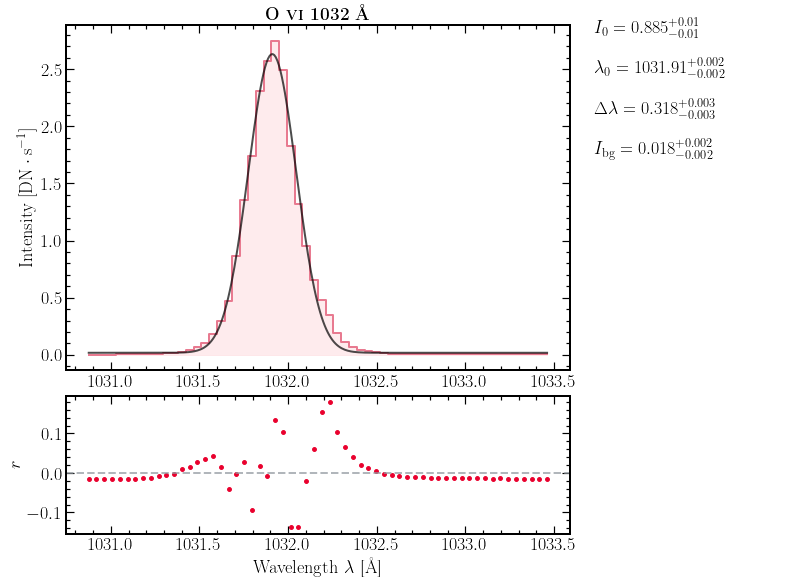

In [19]:
OVI_1032_slice = (360,420)
wvl_OVI_1032 = wvl_509[OVI_1032_slice[0]:OVI_1032_slice[1]]
int_OVI_1032 = np.average(sumer_509_window[-30:,OVI_1032_slice[0]:OVI_1032_slice[1]],axis=0)

OVI_1032_fit_model = SpectrumFitSingle(data=int_OVI_1032,wvl=wvl_OVI_1032,err=None,
                                      same_width=False,line_number=1,line_wvl_init=[1032],
                                      int_max_init=[2.5],fwhm_init=[0.2])
#OVI_1032_fit_model.plot(plot_fit=False,plot_params=False)
#OVI_1032_fit_model.run_lse()
OVI_1032_fit_model.run_HahnMC(n_chain=10000)
OVI_1032_fit_model.plot(plot_title=r"\textbf{O \textsc{vi} 1032 \mbox{\AA}}",plot_hmc=True,
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                               ylabel=r"Intensity $\mathrm{[DN\cdot s^{-1}]}$",
                              color_style="Red")
print("FWHM after removing instrumental broadening: ",
con_width_funct_4(1,OVI_1032_fit_model.line_wvl_fit,1,OVI_1032_fit_model.fwhm_fit*1000,DET_B=True))

In [ ]:
int_OVI_1032_row = np.average(sumer_509_window[-240:,OVI_1032_slice[0]:OVI_1032_slice[1]].reshape(-1,30,OVI_1032_slice[1]-OVI_1032_slice[0]),axis=1)

OVI_1032_fit_row_model = SpectrumFitRow(data=int_OVI_1032_row,wvl=wvl_OVI_1032,err=None,
                                      same_width=False,line_number=1,line_wvl_init=[780.4],
                                      int_max_init=[0.5],fwhm_init=[0.3])
OVI_1032_fit_row_model.run_lse()
OVI_1032_fit_row_model.plot_fit()
OVI_1032_fit_row_model.fwhm_fit = con_width_funct_4(1,OVI_1032_fit_row_model.line_wvl_fit,1, OVI_1032_fit_row_model.fwhm_fit*1000,DET_B=True)/1000
ax = OVI_1032_fit_row_model.plot_variation(xdata=np.flip(np.average(sumer_ycoord[:240].reshape(-1,30),axis=1))/960,
                                            xlabel=r"Heliocentric Distance $\left[R_\odot \right]$")
ax.grid("on")

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:196: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


FWHM after removing instrumental broadening:  [266.19645252]


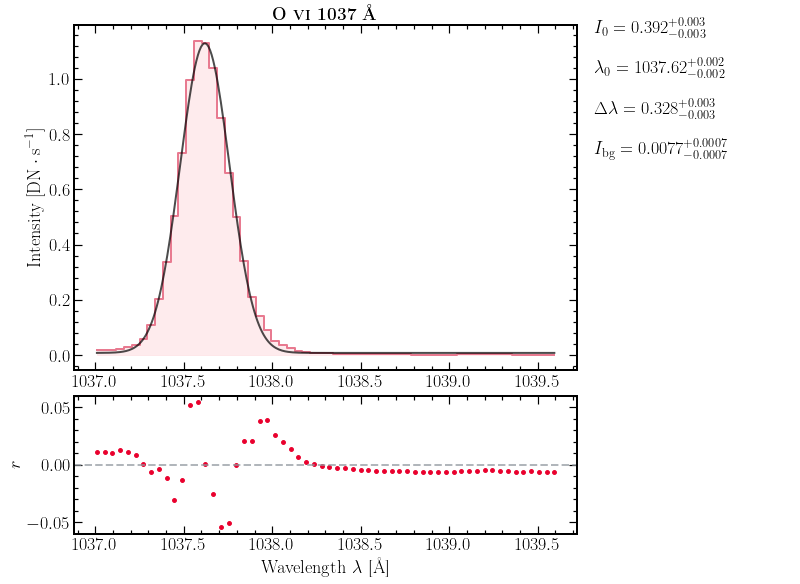

In [20]:
OVI_1037_slice = (500,560)
wvl_OVI_1037 = wvl_509[OVI_1037_slice[0]:OVI_1037_slice[1]]
int_OVI_1037 = np.average(sumer_509_window[-30:,OVI_1037_slice[0]:OVI_1037_slice[1]],axis=0)

OVI_1037_fit_model = SpectrumFitSingle(data=int_OVI_1037,wvl=wvl_OVI_1037,err=None,
                                      same_width=False,line_number=1,line_wvl_init=[1037.6],
                                      int_max_init=[1],fwhm_init=[0.2])
#OVI_1037_fit_model.plot(plot_fit=False,plot_params=False)
#OVI_1037_fit_model.run_lse()
OVI_1037_fit_model.run_HahnMC(n_chain=10000)
OVI_1037_fit_model.plot(plot_title=r"\textbf{O \textsc{vi} 1037 \mbox{\AA}}",plot_hmc=True,
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                               ylabel=r"Intensity $\mathrm{[DN\cdot s^{-1}]}$",
                              color_style="Red")
print("FWHM after removing instrumental broadening: ",
con_width_funct_4(1,OVI_1037_fit_model.line_wvl_fit,1,OVI_1037_fit_model.fwhm_fit*1000,DET_B=True))

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:196: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


FWHM after removing instrumental broadening:  [297.51542649]


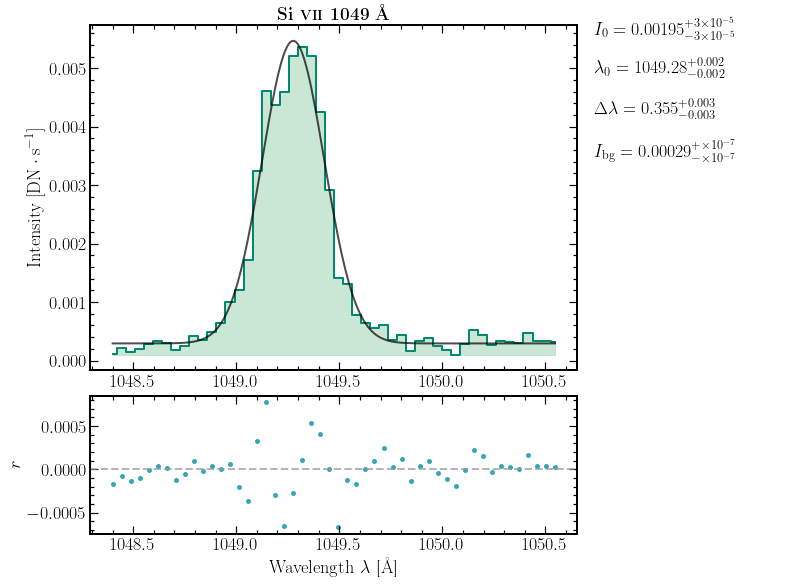

In [21]:
SiVII_1049_slice = (760,810)
wvl_SiVII_1049 = wvl_509[SiVII_1049_slice[0]:SiVII_1049_slice[1]]
int_SiVII_1049 = np.average(sumer_509_window[-30:,SiVII_1049_slice[0]:SiVII_1049_slice[1]],axis=0)

SiVII_1049_fit_model = SpectrumFitSingle(data=int_SiVII_1049,wvl=wvl_SiVII_1049,err=None,
                                      same_width=False,line_number=1,line_wvl_init=[1049.3],
                                      int_max_init=[0.005],fwhm_init=[0.2])
#SiVII_1049_fit_model.plot(plot_fit=False,plot_params=False)
#SiVII_1049_fit_model.run_lse()
SiVII_1049_fit_model.run_HahnMC(n_chain=10000)
SiVII_1049_fit_model.plot(plot_title=r"\textbf{Si \textsc{vii} 1049 \mbox{\AA}}",plot_hmc=True,
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                               ylabel=r"Intensity $\mathrm{[DN\cdot s^{-1}]}$",
                              color_style="Green")
print("FWHM after removing instrumental broadening: ",
con_width_funct_4(1,SiVII_1049_fit_model.line_wvl_fit,1,SiVII_1049_fit_model.fwhm_fit*1000,DET_B=True))


/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:196: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


FWHM after removing instrumental broadening:  [214.73494458]


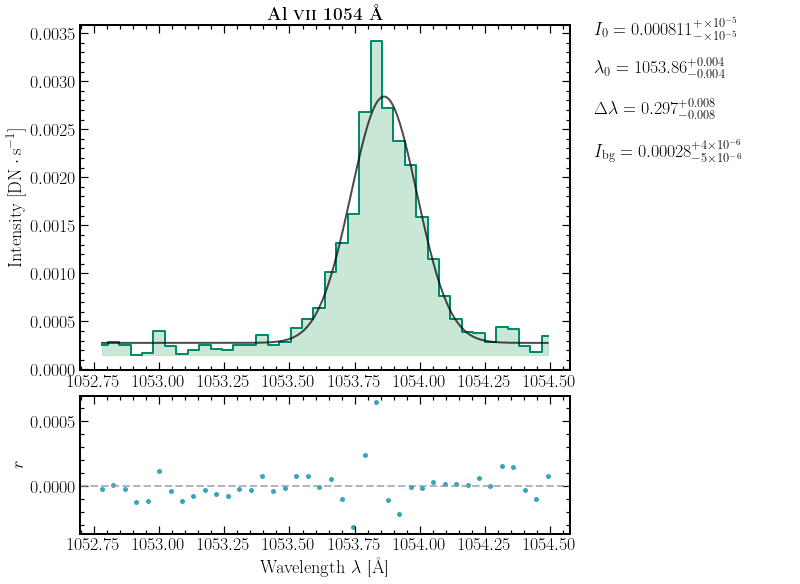

In [22]:
AlVII_1054_slice = (860,900)
wvl_AlVII_1054 = wvl_509[AlVII_1054_slice[0]:AlVII_1054_slice[1]]
int_AlVII_1054 = np.average(sumer_509_window[-30:,AlVII_1054_slice[0]:AlVII_1054_slice[1]],axis=0)

AlVII_1054_fit_model = SpectrumFitSingle(data=int_AlVII_1054,wvl=wvl_AlVII_1054,err=None,
                                      same_width=False,line_number=1,line_wvl_init=[1054],
                                      int_max_init=[0.005],fwhm_init=[0.2])
#AlVII_1054_fit_model.plot(plot_fit=False,plot_params=False)
#AlVII_1054_fit_model.run_lse()
AlVII_1054_fit_model.run_HahnMC(n_chain=10000)
AlVII_1054_fit_model.plot(plot_title=r"\textbf{Al \textsc{vii} 1054 \mbox{\AA}}",plot_hmc=True,
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                               ylabel=r"Intensity $\mathrm{[DN\cdot s^{-1}]}$",
                              color_style="Green")
print("FWHM after removing instrumental broadening: ",
con_width_funct_4(1,AlVII_1054_fit_model.line_wvl_fit,1,AlVII_1054_fit_model.fwhm_fit*1000,DET_B=True))